In [11]:
import os
import pandas as pd
from lib.DKC import DataHandler
# For deplymnet and valuate to find the best model
from lib.DKC import DeployModel
root_source = 'DataSource'

## How load the data?
    # All the pickel formated data need to put in DataSource folder 
    # root_source defined as the DataSource you can change the variable if your data is on other folder
    
## How load the a trained model?
    # we saved the model under the bin folder with .pth extention
    # you can save the folder in any location we saved under bin folder

## How do run the model in Evaqluation mode?
    # Use DeployModel class 
    # there is a function named load_model
    # in this function there is parameter named mode
    # we can padd 'eval' to this parameter to do evaluation
    # !Note : if we are in evaluation we need to have target column in data to do the evaluation
    # !Note : the data we load should have a column name 'class' other wise we cannot evaluate
    # to calculate the f1-score and see the train-eval-test result of the model we can use draw_performance function
    # this function will render a csv file named 'result.csv' generated by the model
    # to get the performance of model on the data we load need to call function get_model_performance
    
    
## How do run the model in Prediction mode?
    # Use DeployModel class 
    # there is a function named load_model
    # in this function there is parameter named mode
    # we can padd 'pred' to this parameter to do evaluation

In [12]:
df_all =pd.read_pickle(root_source+ '/Data.pickle')
df_all.head()

,CDocID,Body,ExternalID,class,OriginBody,clean_text,removed_stopwords,stem_words,2grams,3grams,4grams
0,16,i m raising money for angela mayor de rivas ey...,1357341076261019650,-1,I'm raising money for Angela Mayor de Rivas ey...,i m raising money for angela mayor de rivas ey...,"[raising, money, angela, mayor, de, rivas, eye...","[rais, money, angela, mayor, de, riva, eye, su...","[rais money, money angela, angela mayor, mayor...","[rais money angela, money angela mayor, angela...","[rais money angela mayor, money angela mayor d..."
1,17,the first kidney ball was inso we re celebrati...,1357341794233577473,-1,The first Kidney Ball was in 1981 so we’re cel...,the first kidney ball was inso we re celebrati...,"[first, kidney, ball, inso, celebrating, ouran...","[first, kidney, ball, inso, celebr, ouranniver...","[first kidney, kidney ball, ball inso, inso ce...","[first kidney ball, kidney ball inso, ball ins...","[first kidney ball inso, kidney ball inso cele..."
2,18,sir why nephrology specialist biswa ranjan moh...,1357341815121137667,-1,"@angul_dm Sir,why nephrology specialist Biswa ...",sir why nephrology specialist biswa ranjan moh...,"[sir, nephrology, specialist, biswa, ranjan, m...","[sir, nephrolog, specialist, biswa, ranjan, mo...","[sir nephrolog, nephrolog specialist, speciali...","[sir nephrolog specialist, nephrolog specialis...","[sir nephrolog specialist biswa, nephrolog spe..."
3,19,wdym by having their heart kidney and liver to...,1357341922382127106,-1,@TuffsNotEnuff @IthyTim @mbracemoore @pjlark W...,wdym by having their heart kidney and liver to...,"[wdym, heart, kidney, liver, torn, sarcastic]","[wdym, heart, kidney, liver, torn, sarcast]","[wdym heart, heart kidney, kidney liver, liver...","[wdym heart kidney, heart kidney liver, kidney...","[wdym heart kidney liver, heart kidney liver t..."
4,20,i prefer kidney beans up my ass because i m cl...,1357341922839306268,-1,@eldestdaughterr I prefer Kidney Beans up my a...,i prefer kidney beans up my ass because i m cl...,"[prefer, kidney, beans, ass, classy, nail, pol...","[prefer, kidney, bean, as, classi, nail, polish]","[prefer kidney, kidney bean, bean as, as class...","[prefer kidney bean, kidney bean as, bean as c...","[prefer kidney bean as, kidney bean as classi,..."


In [13]:
df_train =pd.read_pickle(root_source+ '/TrainData/train.pickle')
df_train.head()


,clean_text,stem_words,2grams,3grams,4grams,class
0,is anything different from when you hadkidneys...,"[anyth, differ, hadkidney, trade, mark, donat,...","[anyth differ, differ hadkidney, hadkidney tra...","[anyth differ hadkidney, differ hadkidney trad...","[anyth differ hadkidney trade, differ hadkidne...",0
1,many kidney donation scars end up looking pret...,"[mani, kidney, donat, scar, end, look, pretti,...","[mani kidney, kidney donat, donat scar, scar e...","[mani kidney donat, kidney donat scar, donat s...","[mani kidney donat scar, kidney donat scar end...",0
2,i felt the same way about the gas too after my...,"[felt, way, ga, surgeri, worst, part, dang, ga...","[felt way, way ga, ga surgeri, surgeri worst, ...","[felt way ga, way ga surgeri, ga surgeri worst...","[felt way ga surgeri, way ga surgeri worst, ga...",0
3,if you re healthy enough to undergo transplant...,"[healthi, enough, undergo, transplant, surgeri...","[healthi enough, enough undergo, undergo trans...","[healthi enough undergo, enough undergo transp...","[healthi enough undergo transplant, enough und...",0
4,salaam my family and i are raising money for a...,"[salaam, famili, rais, money, kidney, stone, t...","[salaam famili, famili rais, rais money, money...","[salaam famili rais, famili rais money, rais m...","[salaam famili rais money, famili rais money k...",0


In [14]:
df_train['class'].value_counts()

0    212
1    212
Name: class, dtype: int64

# Draw model perfomance after training
    # this part need a csv file named result.csv that generated when we train the model
    # it can be found where the model is

best f1 score: 0.8409090909090909
best epoch:  81


C:\Users\m0asg\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\m0asg\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\m0asg\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


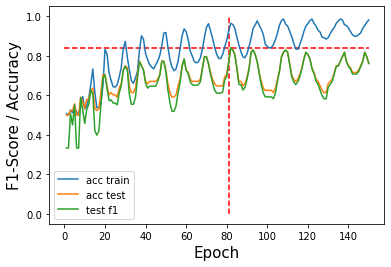

In [15]:
deploy = DeployModel()
model = 'bin/Best_Model/exp_char_gram_10_embs700_bats8_hiddd50_lr1e-05/'
deploy.draw_performance(model)

# Model evaluation on train DataSet

{'embbeding_type': 'char_gram_10', 'vocab_size': 16262, 'embedding_dim': 700, 'output_number': 2, 'hidden_dim': 50, 'hop': 8, 'lr': 1e-05, 'cuda': {'isactive': True, 'device': 0}, 'batch_size': 8}
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       212
           1       0.98      0.97      0.97       212

    accuracy                           0.97       424
   macro avg       0.97      0.97      0.97       424
weighted avg       0.97      0.97      0.97       424



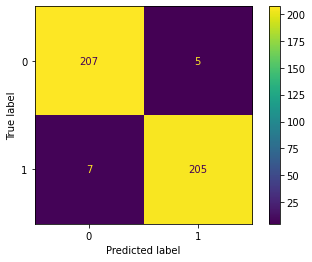

In [16]:
deploy = DeployModel()
model = 'bin/Best_Model/exp_char_gram_10_embs700_bats8_hiddd50_lr1e-05/'
results = deploy.load_model(model,root_source+ '/TrainData/train.pickle',
                                          mode='eval')
deploy.get_model_performance()


# Model evaluation on Test DataSet

{'embbeding_type': 'char_gram_10', 'vocab_size': 16262, 'embedding_dim': 700, 'output_number': 2, 'hidden_dim': 50, 'hop': 8, 'lr': 1e-05, 'cuda': {'isactive': True, 'device': 0}, 'batch_size': 8}
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.84      0.84      0.84        44

    accuracy                           0.84        88
   macro avg       0.84      0.84      0.84        88
weighted avg       0.84      0.84      0.84        88



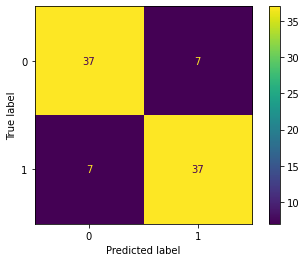

In [17]:
deploy = DeployModel()
model = 'bin/Best_Model/exp_char_gram_10_embs700_bats8_hiddd50_lr1e-05/'
results = deploy.load_model(model,root_source+ '/TrainData/test.pickle',
                                          mode='eval')
deploy.get_model_performance()

# Predictions

In [18]:
deploy = DeployModel()
results = deploy.load_model('bin/Best_Model/exp_char_gram_10_embs700_bats8_hiddd50_lr1e-05/',root_source+ '/Data.pickle',
                                          mode='pred')
print(deploy.data['pred'].value_counts())

{'embbeding_type': 'char_gram_10', 'vocab_size': 16262, 'embedding_dim': 700, 'output_number': 2, 'hidden_dim': 50, 'hop': 8, 'lr': 1e-05, 'cuda': {'isactive': True, 'device': 0}, 'batch_size': 8}
0    214025
1     10677
Name: pred, dtype: int64


In [19]:
deploy = DeployModel()
results = deploy.load_model('bin/Best_Model_2/exp_stem_words_embs500_bats8_hiddd50_lr0_0001/',root_source+ '/Data.pickle',
                                          mode='pred')
print(deploy.data['pred'].value_counts())

{'embbeding_type': 'stem_words', 'vocab_size': 1535, 'embedding_dim': 500, 'output_number': 2, 'hidden_dim': 50, 'hop': 8, 'lr': 0.0001, 'cuda': {'isactive': True, 'device': 0}, 'batch_size': 8}
1    191959
0     32743
Name: pred, dtype: int64


In [20]:
deploy = DeployModel()
results = deploy.load_model('bin/Best_Model_3/exp_char_gram_10_embs1204_bats16_hiddd400_lr1e-05/',root_source+ '/Data.pickle',
                                          mode='pred')
print(deploy.data['pred'].value_counts())

{'embbeding_type': 'char_gram_10', 'vocab_size': 9424, 'embedding_dim': 1204, 'output_number': 2, 'hidden_dim': 400, 'hop': 16, 'lr': 1e-05, 'cuda': {'isactive': True, 'device': 0}, 'batch_size': 16}
0    188125
1     36577
Name: pred, dtype: int64
